<a href="https://colab.research.google.com/github/Darktechie-programmer/Deep_learning_projects/blob/master/Cancer_Detection_using_transfer_learning/Cancer_Detection_using_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## install the dependencies
!pip install kaggle

In [ ]:
## upload the link and key for the kaggle connection
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"techieamit","key":"c058ab252b1af78b12454730ec14665f"}'}

In [ ]:
## add the folder 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

## change the permission 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# add the my username in kaggle
!kaggle kernels list — user techieamit  — sort-by dateRun

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: — user techieamit — sort-by dateRun


In [ ]:
### download or can say link the dataset to colab 
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 33.3MB/s]
100% 2.29G/2.29G [00:30<00:00, 79.8MB/s]


In [ ]:
## unzip the dataset
!unzip -q chest-xray-pneumonia.zip -d .

In [ ]:
# Import the libraries....
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
## check the how many folder in the dataset
!ls chest_xray/

chest_xray  __MACOSX  test  train  val


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train/'
valid_path = 'chest_xray/test/'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('chest_xray/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 111s 680ms/step - loss: 0.1707 - accuracy: 0.9287 - val_loss: 0.0495 - val_accuracy: 0.9135
Epoch 2/5
163/163 [==============================] - 102s 629ms/step - loss: 0.1154 - accuracy: 0.9582 - val_loss: 0.3837 - val_accuracy: 0.8942
Epoch 3/5
163/163 [==============================] - 103s 630ms/step - loss: 0.1241 - accuracy: 0.9521 - val_loss: 0.1992 - val_accuracy: 0.8910
Epoch 4/5
163/163 [==============================] - 103s 630ms/step - loss: 0.0905 - accuracy: 0.9659 - val_loss: 0.1593 - val_accuracy: 0.8990
Epoch 5/5
163/163 [==============================] - 103s 631ms/step - loss: 0.0961 - accuracy: 0.9643 - val_loss: 0.0136 - val_accuracy: 0.9071


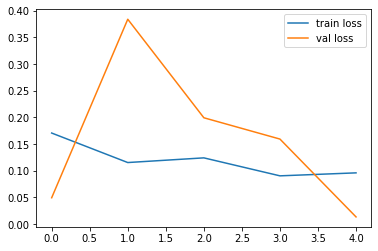

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

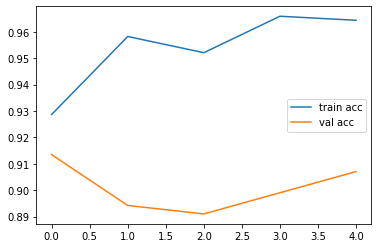

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model
## save the model 
model.save('model_vgg16.h5')

In [ ]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

# Use after next..

In [ ]:
## these libraries use for load and check the model
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_check = load_model('model_vgg16.h5')

In [ ]:
## test 1: 
## load the image and check the prediction
img = image.load_img('chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)

In [ ]:
## classes give the ans... first value for NORMAL second for Cancer
classes

array([[0., 1.]], dtype=float32)

In [ ]:
## check the prediction
if classes[0][0] <= 0.5:
  print("Oops! You have cancer.")
else:
  print("Great! You don't have cancer.")

Oops! You have cancer.


In [ ]:
## test 2: 
img = image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)
if classes[0][0] <= 0.5:
  print("Oops! You have cancer.")
else:
  print("Great! You don't have cancer.")

Great! You don't have cancer.
